In [1]:
# Importando bibliotecas
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [2]:
# Lectura del dataset
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

In [3]:
# Estimar la gaussiana
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

In [4]:
# Obtenemos la distribución multivariada siguiente la gaussiana obtenida
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [5]:
# Seleccionar cual es el mejor threshold
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon

In [6]:
# Cargando los datasets
tr_data = read_dataset('dataset/tr_server_data.csv') 
cv_data = read_dataset('dataset/cv_server_data.csv') 
gt_data = read_dataset('dataset/gt_server_data.csv')

In [7]:
# Datos del dataset
n_training_samples = tr_data.shape[0]
n_dim = tr_data.shape[1]

print('Number of datapoints in training set: %d' % n_training_samples)
print('Number of dimensions/features: %d' % n_dim)

Number of datapoints in training set: 307
Number of dimensions/features: 2


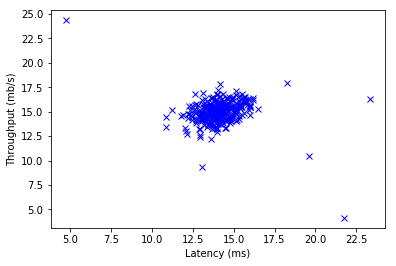

In [8]:
# Ploteando los datos
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.show()

In [9]:
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data,mu,sigma)

In [10]:
# escogiendo el valor optimo para epsilon usando cross-validation
p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
print(fscore, ep)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.875 9.036201327981216e-05


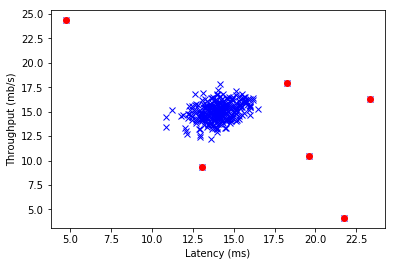

In [11]:
# Ploteando los outliers
outliers = np.asarray(np.where(p < ep))

plt.figure()
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.plot(tr_data[outliers,0],tr_data[outliers,1],'ro')
plt.show()